In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcYXN1c1xEZXNrdG9wXFJccXVhcnRvXE1lZC1TdGF0LU5vdGVz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\asus\AppData\Local\Temp\ipykernel_16732\167036271.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap_external.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\zipimport.py": 1738656314.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\codecs.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\aliases.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\__init__.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\utf_8.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\abc.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\io.py": 1738656312.0, "C:\\Users\\asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\stat.py": 17386

In [2]:
import pandas as pd
ovarian = pd.read_csv(r"C:\Users\asus\Desktop\R\quarto\Med-Stat-Notes\Data\ovarian.csv")
ovarian.head()

,futime,fustat,age,resid.ds,rx,ecog.ps
0,59,1,72.3315,2,1,1
1,115,1,74.4932,2,1,1
2,156,1,66.4658,2,1,2
3,421,0,53.3644,2,2,1
4,431,1,50.3397,2,1,1


In [3]:
# 假设 ovarian 是你的 DataFrame
print(ovarian.columns)

# 尝试将 age 列转换为数值类型
ovarian['age'] = pd.to_numeric(ovarian['age'], errors='coerce')

ovarian.age = pd.cut(ovarian.age, [0,50,75], labels = ['<=50','>50'])

ovarian['resid.ds'] = ovarian['resid.ds'].map({1: "NO", 2: "Yes"})
ovarian['rx'] = ovarian['rx'].map({1: "A", 2: "B"})
ovarian['ecog.ps'] = ovarian['ecog.ps'].map({1: "Good", 2: "Bad"})

Index(['futime', 'fustat', 'age', 'resid.ds', 'rx', 'ecog.ps'], dtype='object')


In [4]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
fit = kmf.fit(ovarian.futime,ovarian.fustat)
fit

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 26 total observations, 14 right-censored observations>

In [5]:
fit.median_survival_time_

638.0

In [6]:
pd.concat([fit.event_table,fit.survival_function_], axis = 1)

,removed,observed,censored,entrance,at_risk,KM_estimate
0.0,0,0,0,26,26,1.000000
59.0,1,1,0,0,26,0.961538
115.0,1,1,0,0,25,0.923077
156.0,1,1,0,0,24,0.884615
268.0,1,1,0,0,23,0.846154
329.0,1,1,0,0,22,0.807692
353.0,1,1,0,0,21,0.769231
365.0,1,1,0,0,20,0.730769
377.0,1,0,1,0,19,0.730769
421.0,1,0,1,0,18,0.730769


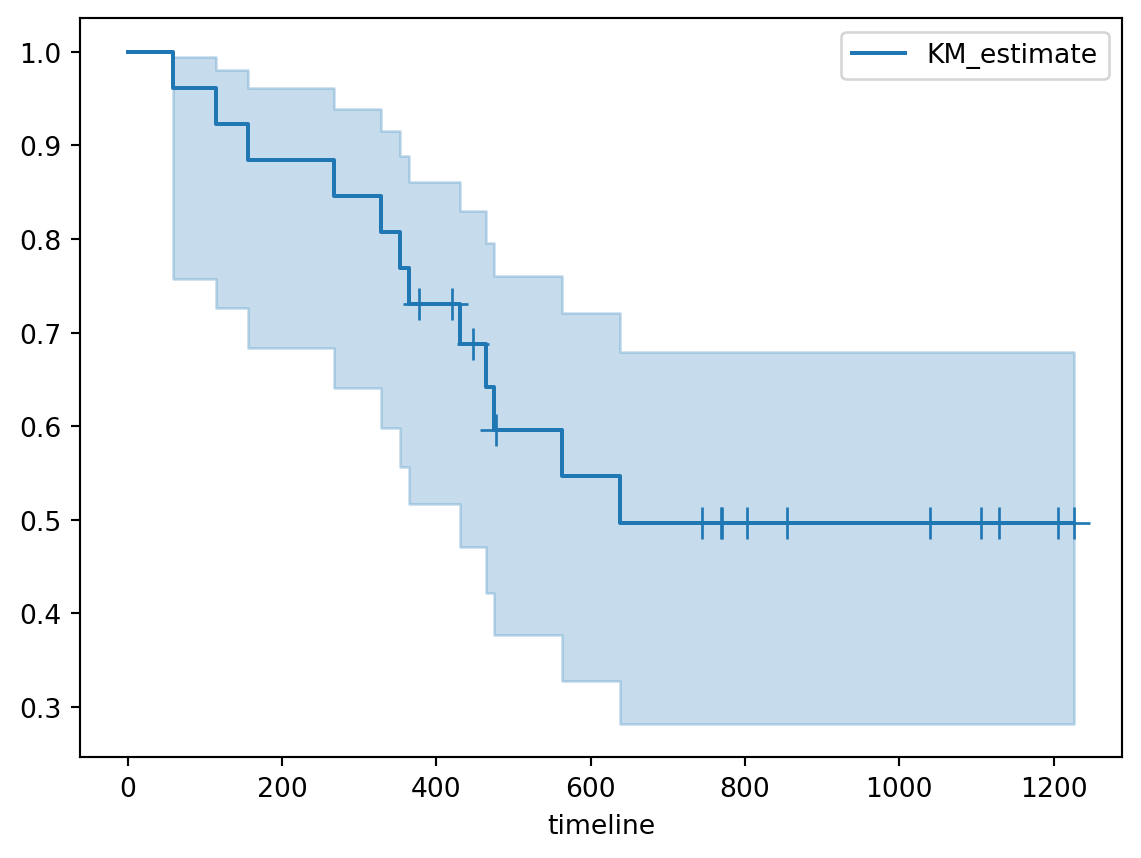

In [7]:
import matplotlib.pyplot as plt
fit.plot(show_censors = True)
plt.show()

In [8]:
g1 = ovarian.rx == "A"
g2 = ovarian.rx == "B"
kmf_A = KaplanMeierFitter()
kmf_A.fit(ovarian.futime[g1],ovarian.fustat[g1],label = "Treatmeat A")
kmf_B = KaplanMeierFitter()
kmf_B.fit(ovarian.futime[g2],ovarian.fustat[g2],label = "Treatmeat B")

<lifelines.KaplanMeierFitter:"Treatmeat B", fitted with 13 total observations, 8 right-censored observations>

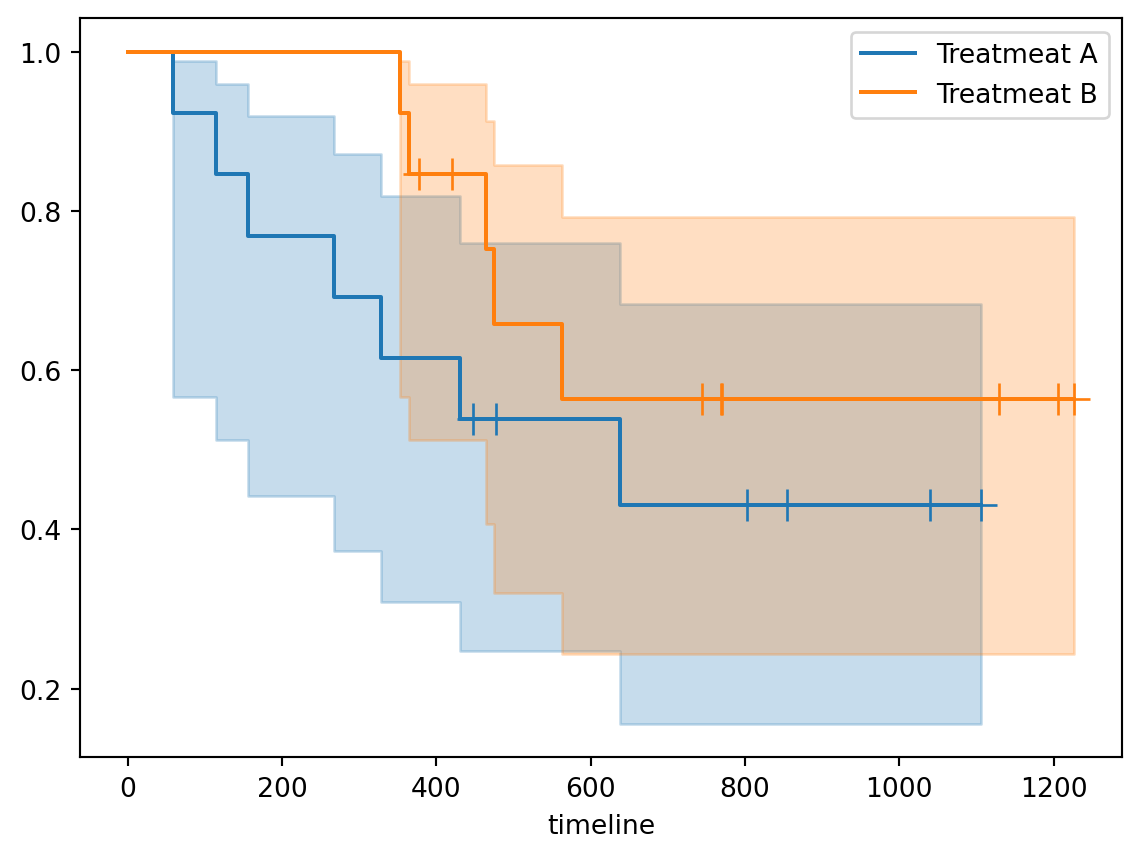

In [9]:
fig, axes = plt.subplots()
kmf_A.plot(ax = axes,show_censors = True)
kmf_B.plot(ax = axes,show_censors = True)
plt.show()